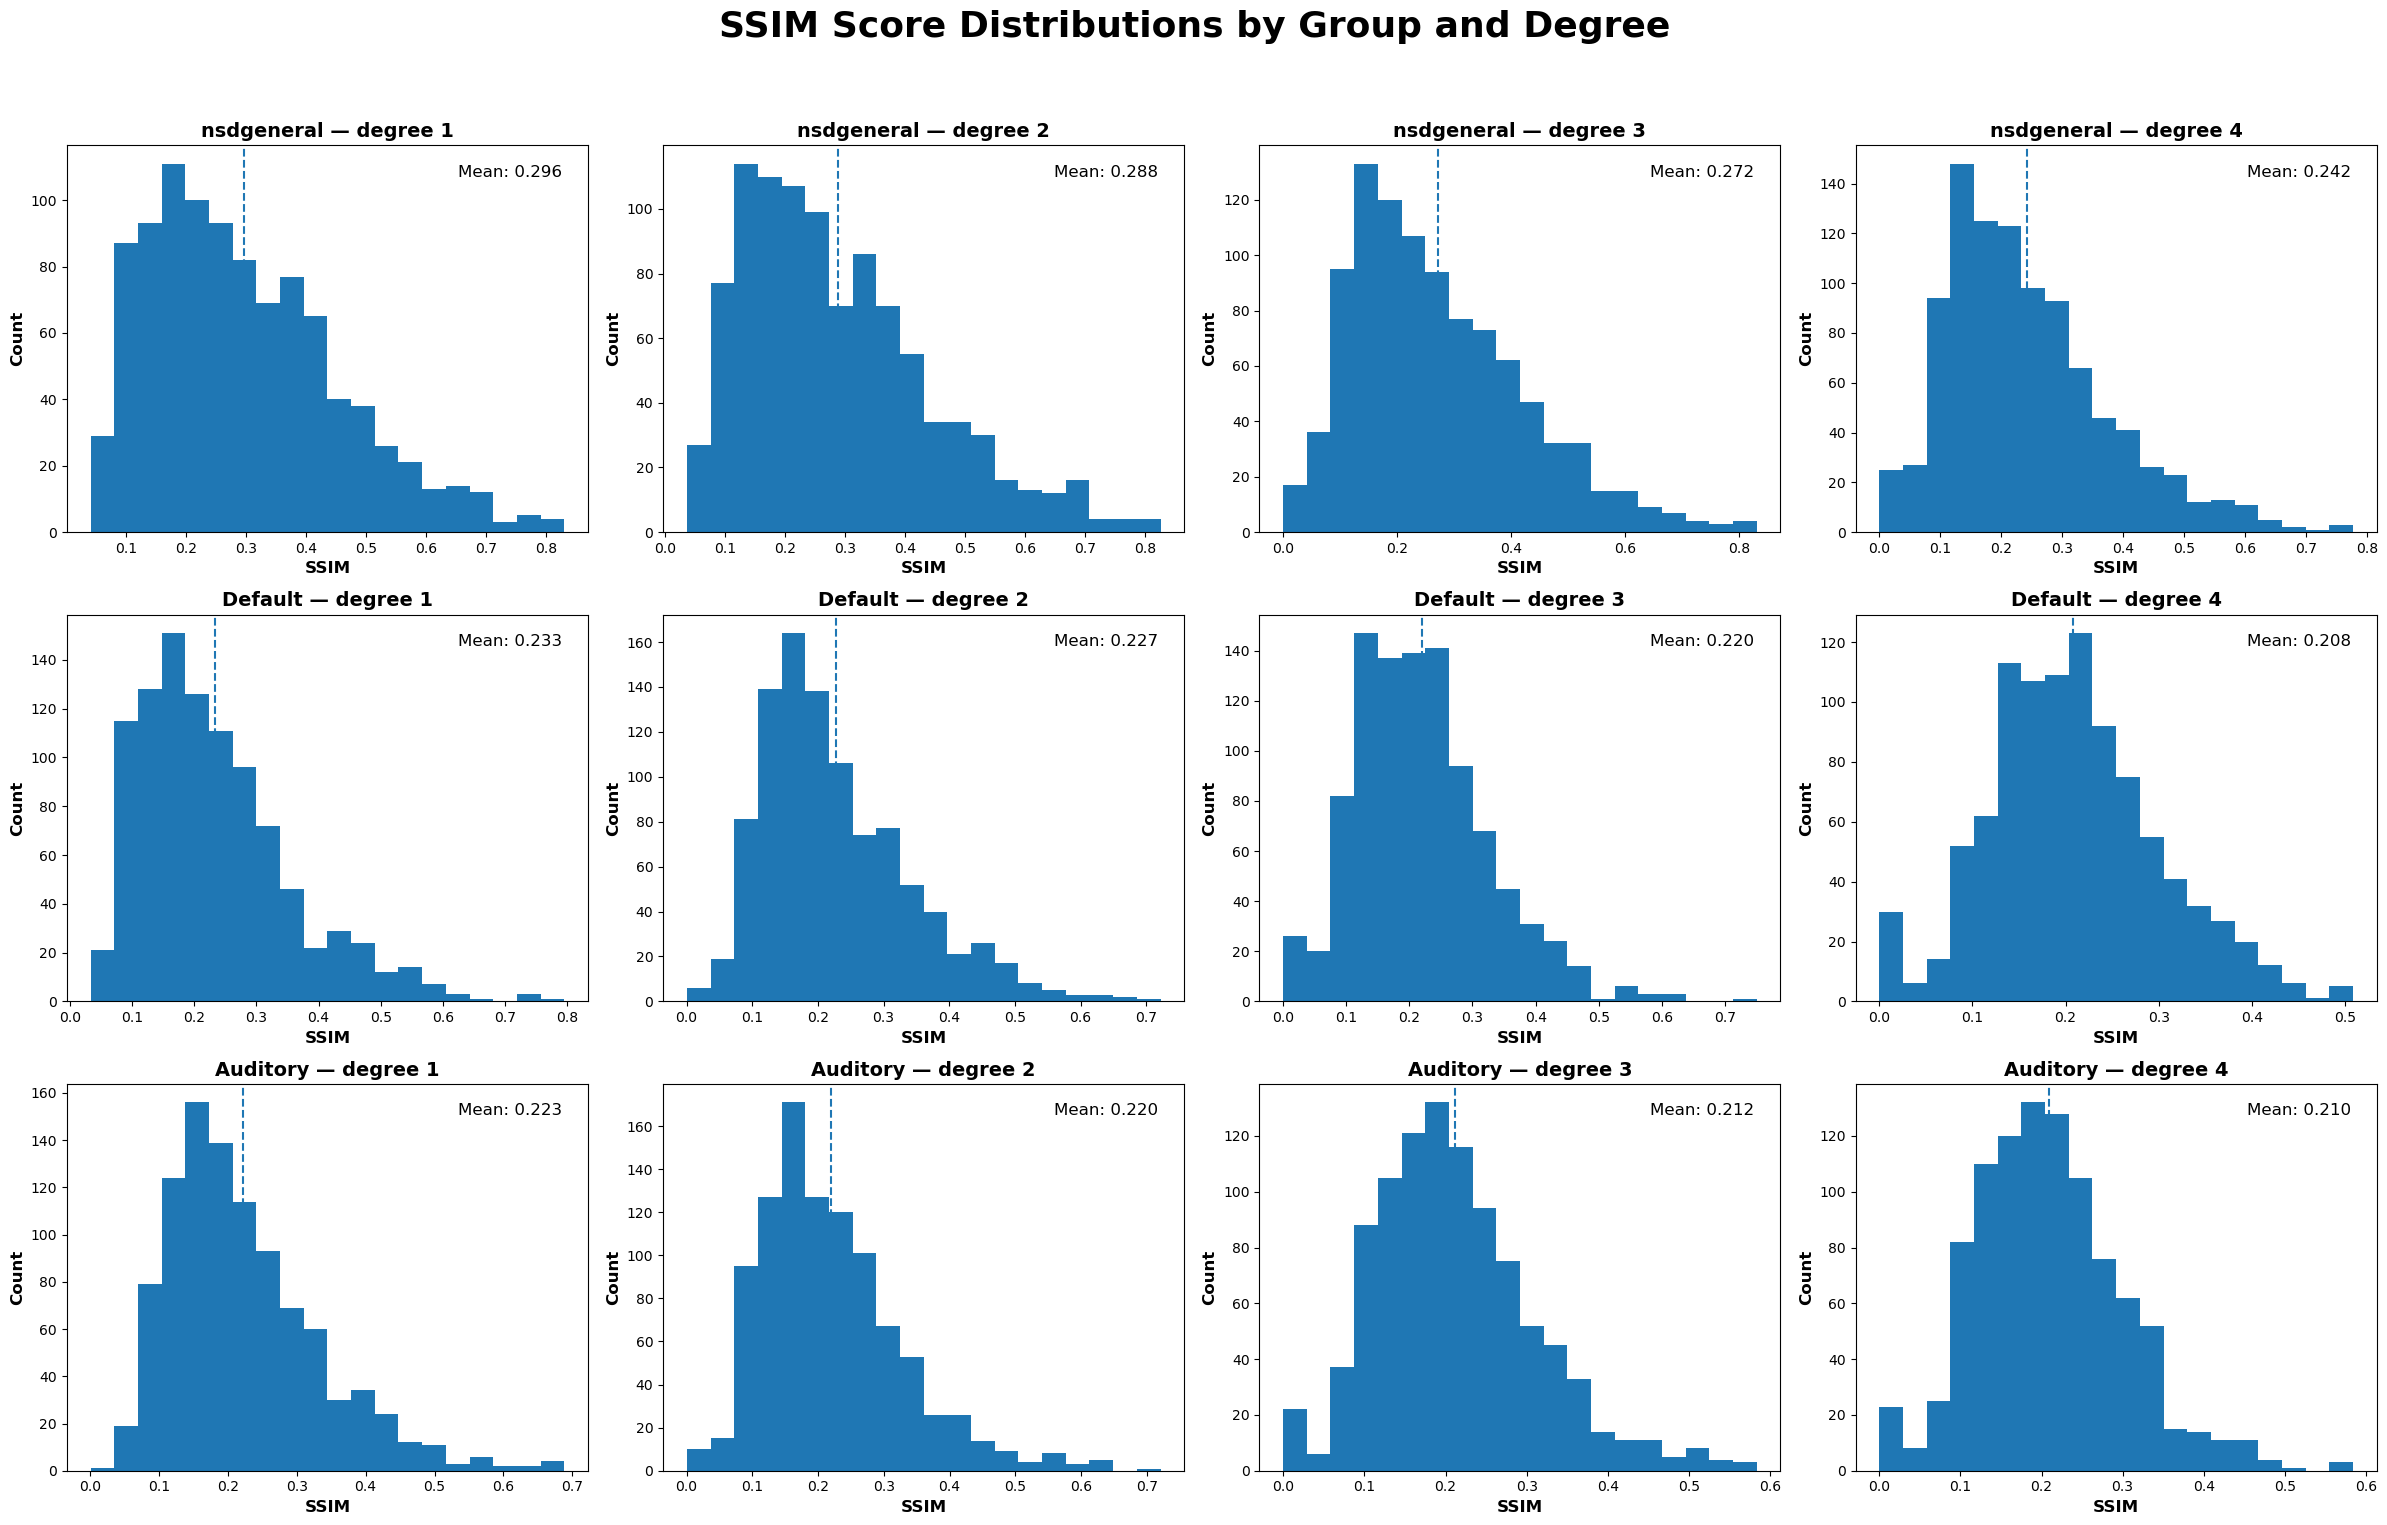

In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pathlib import Path

# === Adjust this path if needed ===
pkl_path = Path(r"C:\Users\sOrOush\SoroushProjects\14_CLIP_Ozcelic\results\assessor_results\ssim_res.pkl")

# Load SSIM results
with open(pkl_path, 'rb') as f:
    ssim_res = pickle.load(f)

# Define groups and degrees
groups = ["nsdgeneral", "Default", "Auditory"]
degrees = [1, 2, 3, 4]

# Create a grid of histograms: 3 rows (groups) x 4 cols (degrees)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 16))
fig.suptitle('SSIM Score Distributions by Group and Degree', fontsize=26, fontweight='bold')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

for i, group in enumerate(groups):
    for j, degree in enumerate(degrees):
        key = f"{group}_degree{degree}"
        ax = axes[i, j]

        scores = np.array(ssim_res.get(key, []))
        if scores.size == 0:
            ax.text(0.5, 0.5, 'No data', ha='center', va='center', fontsize=14, color='red')
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            # Histogram of SSIM scores
            ax.hist(scores, bins=20)
            mean_val = scores.mean()
            ax.axvline(mean_val, linestyle='--')
            ax.text(0.95, 0.95, f'Mean: {mean_val:.3f}',
                    transform=ax.transAxes, ha='right', va='top', fontsize=12)

        ax.set_title(f'{group} — degree {degree}', fontsize=14, fontweight='bold')
        ax.set_xlabel('SSIM', fontsize=12, fontweight='bold')
        ax.set_ylabel('Count', fontsize=12, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [3]:
ssim_res

{'nsdgeneral_degree1': [0.14889054,
  0.1516786,
  0.64020234,
  0.25629714,
  0.050485823,
  0.4146954,
  0.20623682,
  0.08040517,
  0.49208155,
  0.2689385,
  0.35198906,
  0.23983897,
  0.27800295,
  0.11162537,
  0.5884464,
  0.44115314,
  0.6714569,
  0.4124272,
  0.4202445,
  0.46327493,
  0.54348516,
  0.2359938,
  0.6100716,
  0.53759533,
  0.10534846,
  0.50783986,
  0.36839142,
  0.38490787,
  0.23278058,
  0.06113414,
  0.23037249,
  0.20754135,
  0.114494056,
  0.13763061,
  0.40187237,
  0.1966378,
  0.17909586,
  0.31653774,
  0.2684677,
  0.16850589,
  0.12608816,
  0.15414572,
  0.68275625,
  0.110750176,
  0.110794924,
  0.1761247,
  0.41598263,
  0.40898192,
  0.14529489,
  0.10004851,
  0.12625907,
  0.2392094,
  0.4270552,
  0.5211871,
  0.3854806,
  0.16273181,
  0.6229766,
  0.4379572,
  0.14398696,
  0.20213829,
  0.34414545,
  0.09290442,
  0.45774877,
  0.17956133,
  0.41515267,
  0.4762497,
  0.10632476,
  0.30819687,
  0.47534588,
  0.4592135,
  0.7180202,
 

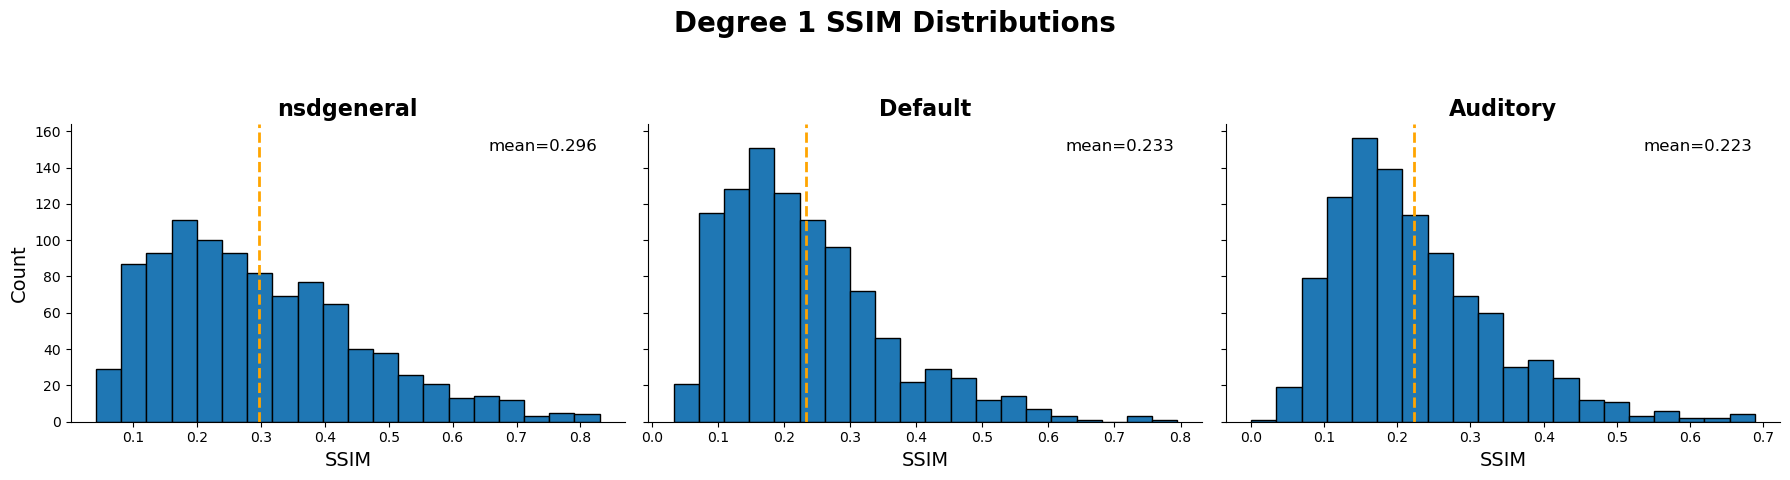

In [2]:
import pickle
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# ── ADJUST THIS ───────────────────────────────────────────────────────────────
pkl_path = Path(r'C:\Users\sOrOush\SoroushProjects\14_CLIP_Ozcelic\results\assessor_results\ssim_res.pkl')
# ────────────────────────────────────────────────────────────────────────────────

# Load the results dict
with open(pkl_path, 'rb') as f:
    ssim_res = pickle.load(f)

# Groups and the specific “degree 1” key
groups = ['nsdgeneral', 'Default', 'Auditory']
degree = 1

# Plot setup
fig, axes = plt.subplots(1, len(groups), figsize=(18, 5), sharey=True)
fig.suptitle(f'Degree {degree} SSIM Distributions', fontsize=20, fontweight='bold')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top']   = False

for ax, grp in zip(axes, groups):
    key = f"{grp}_degree{degree}"
    scores = np.array(ssim_res.get(key, []))

    if scores.size == 0:
        ax.text(.5, .5, 'no data', ha='center', va='center', color='red', fontsize=14)
        ax.set_xticks([])
    else:
        # histogram + mean‐line
        ax.hist(scores, bins=20, edgecolor='black')
        m = scores.mean()
        ax.axvline(m, color='orange', linestyle='--', linewidth=2)
        ax.text(0.95, 0.95, f"mean={m:.3f}",
                transform=ax.transAxes, ha='right', va='top', fontsize=12)

    ax.set_title(grp, fontsize=16, fontweight='bold')
    ax.set_xlabel('SSIM', fontsize=14)
    if grp == groups[0]:
        ax.set_ylabel('Count', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()


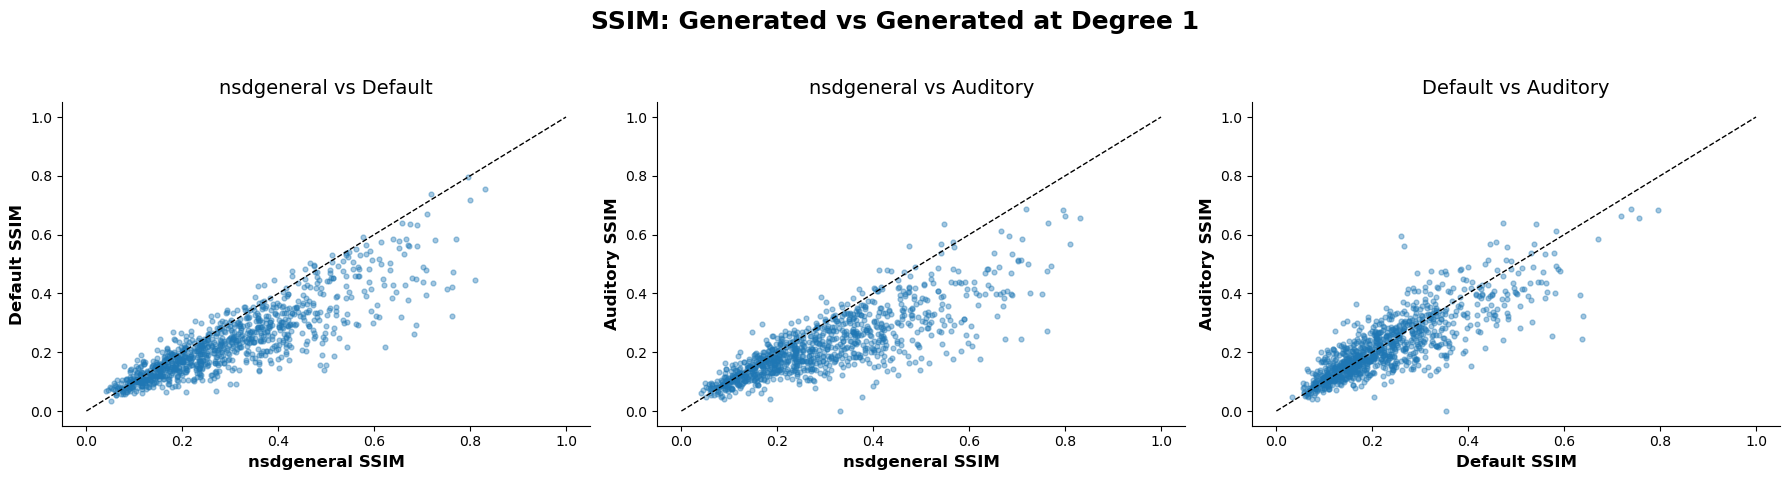

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from itertools import combinations

# ── ADJUST THIS ───────────────────────────────────────────────────────────────
pkl_path = Path(r'C:\Users\sOrOush\SoroushProjects\14_CLIP_Ozcelic\results\assessor_results\ssim_res.pkl')
# ────────────────────────────────────────────────────────────────────────────────

# Load your SSIM dict
with open(pkl_path, 'rb') as f:
    ssim_res = pickle.load(f)

# Choose the degree you want to compare
degree = 1

# Your three groups
groups = ['nsdgeneral', 'Default', 'Auditory']

# Generate all pairwise combinations of groups
pairs = list(combinations(groups, 2))

# Prepare subplots
fig, axes = plt.subplots(1, len(pairs), figsize=(6 * len(pairs), 5))
fig.suptitle(f'SSIM: Generated vs Generated at Degree {degree}', fontsize=18, fontweight='bold')

for ax, (g1, g2) in zip(axes, pairs):
    key1 = f'{g1}_degree{degree}'
    key2 = f'{g2}_degree{degree}'

    x = np.array(ssim_res.get(key1, []))
    y = np.array(ssim_res.get(key2, []))

    # If lengths differ, truncate to the shortest
    n = min(len(x), len(y))
    if n == 0:
        ax.text(0.5, 0.5, 'no data', ha='center', va='center', color='red', fontsize=14)
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.scatter(x[:n], y[:n], s=12, alpha=0.4)
        # 45° reference line
        ax.plot([0, 1], [0, 1], 'k--', linewidth=1)

    ax.set_xlabel(f'{g1} SSIM', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'{g2} SSIM', fontsize=12, fontweight='bold')
    ax.set_title(f'{g1} vs {g2}', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



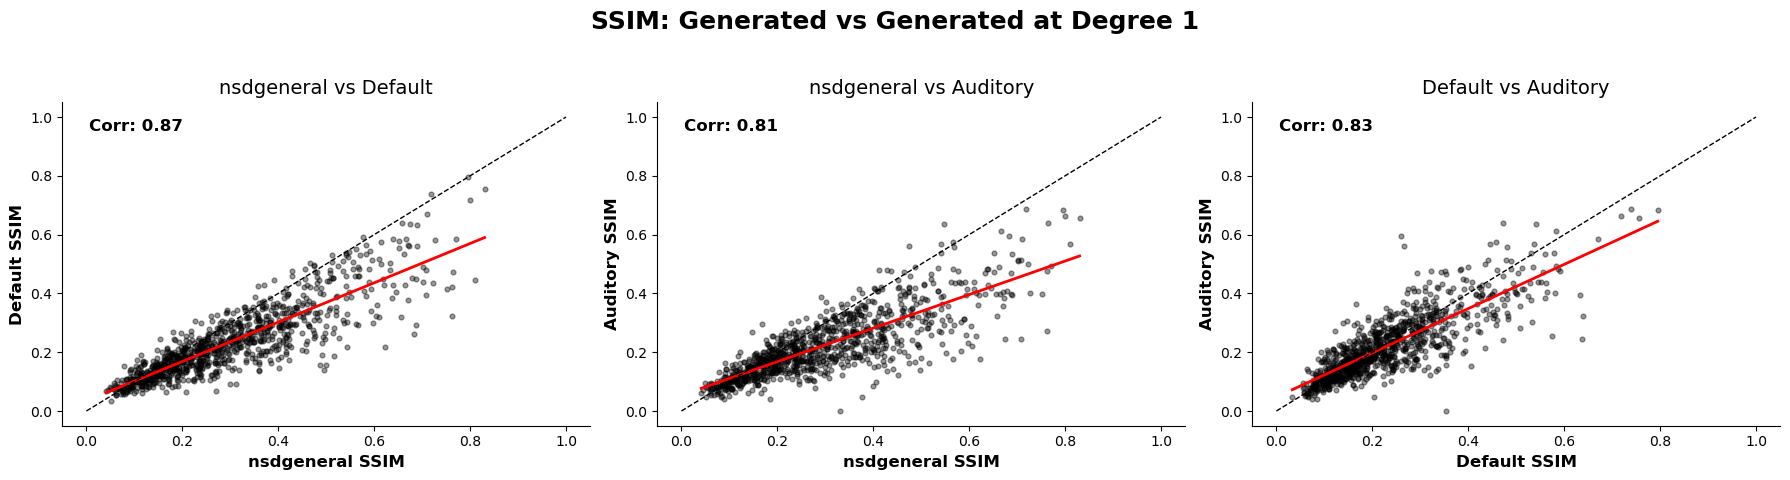

In [8]:
import pickle
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from itertools import combinations

# ── ADJUST THE PATH TO YOUR PICKLE FILE ───────────────────────────────────────
pkl_path = Path(r'C:\Users\sOrOush\SoroushProjects\14_CLIP_Ozcelic\results\assessor_results\ssim_res.pkl')
# ────────────────────────────────────────────────────────────────────────────────

# Load the SSIM results dictionary
with open(pkl_path, 'rb') as f:
    ssim_res = pickle.load(f)

# Configuration
groups = ['nsdgeneral', 'Default', 'Auditory']
degree = 1  # Change this to plot other degrees

# Generate all pairwise group combinations
pairs = list(combinations(groups, 2))

# Figure setup
fig, axes = plt.subplots(1, len(pairs), figsize=(6 * len(pairs), 5))
fig.suptitle(f'SSIM: Generated vs Generated at Degree {degree}', fontsize=18, fontweight='bold')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top']   = False

# Plot each pair
for ax, (g1, g2) in zip(axes, pairs):
    key1 = f'{g1}_degree{degree}'
    key2 = f'{g2}_degree{degree}'
    x = np.array(ssim_res.get(key1, []))
    y = np.array(ssim_res.get(key2, []))

    # Truncate to shortest length
    n = min(len(x), len(y))
    if n == 0:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center', color='red', fontsize=14)
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        x = x[:n]
        y = y[:n]
        # Scatter points
        ax.scatter(x, y, s=12, alpha=0.4, color='black')
        # Regression line
        m, b = np.polyfit(x, y, 1)
        xs = np.array([x.min(), x.max()])
        ax.plot(xs, m * xs + b, color='red', linewidth=2)
        # Correlation coefficient
        corr_coef = np.corrcoef(x, y)[0, 1]
        ax.text(0.05, 0.95, f'Corr: {corr_coef:.2f}',
                transform=ax.transAxes, va='top', fontsize=12, fontweight='bold')

    ax.plot([0, 1], [0, 1], 'k--', linewidth=1)  # 45° reference line
    ax.set_xlabel(f'{g1} SSIM', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'{g2} SSIM', fontsize=12, fontweight='bold')
    ax.set_title(f'{g1} vs {g2}', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



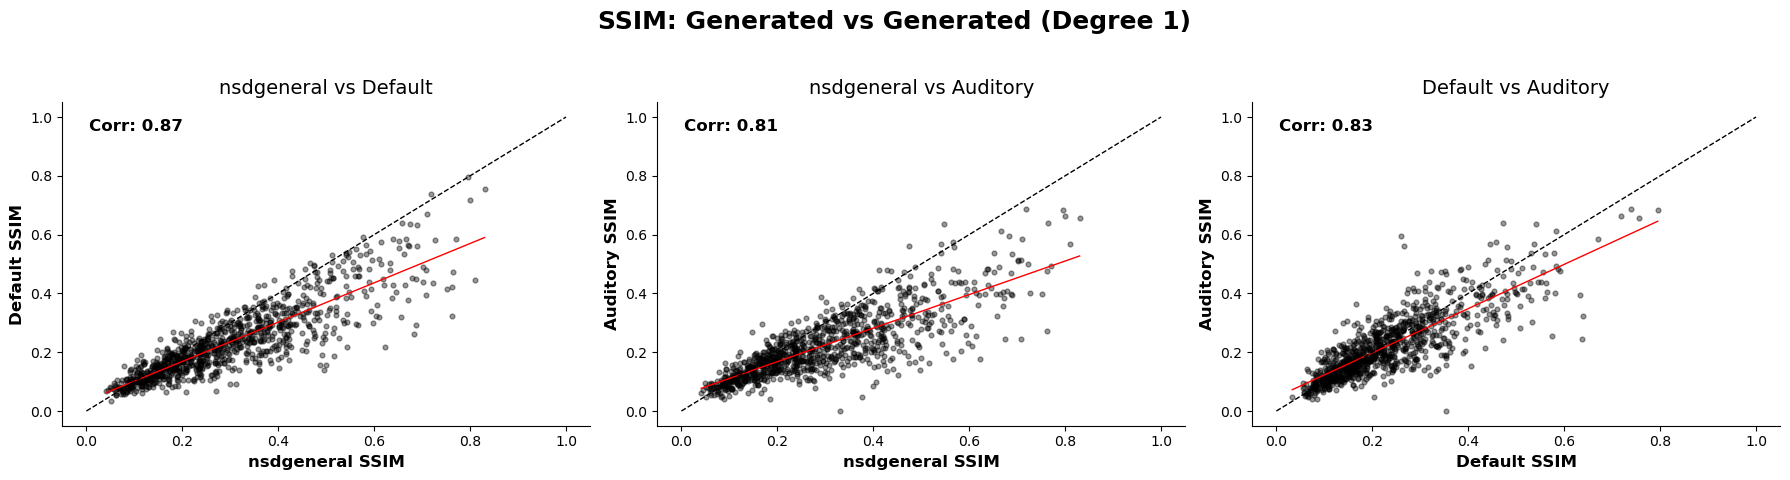

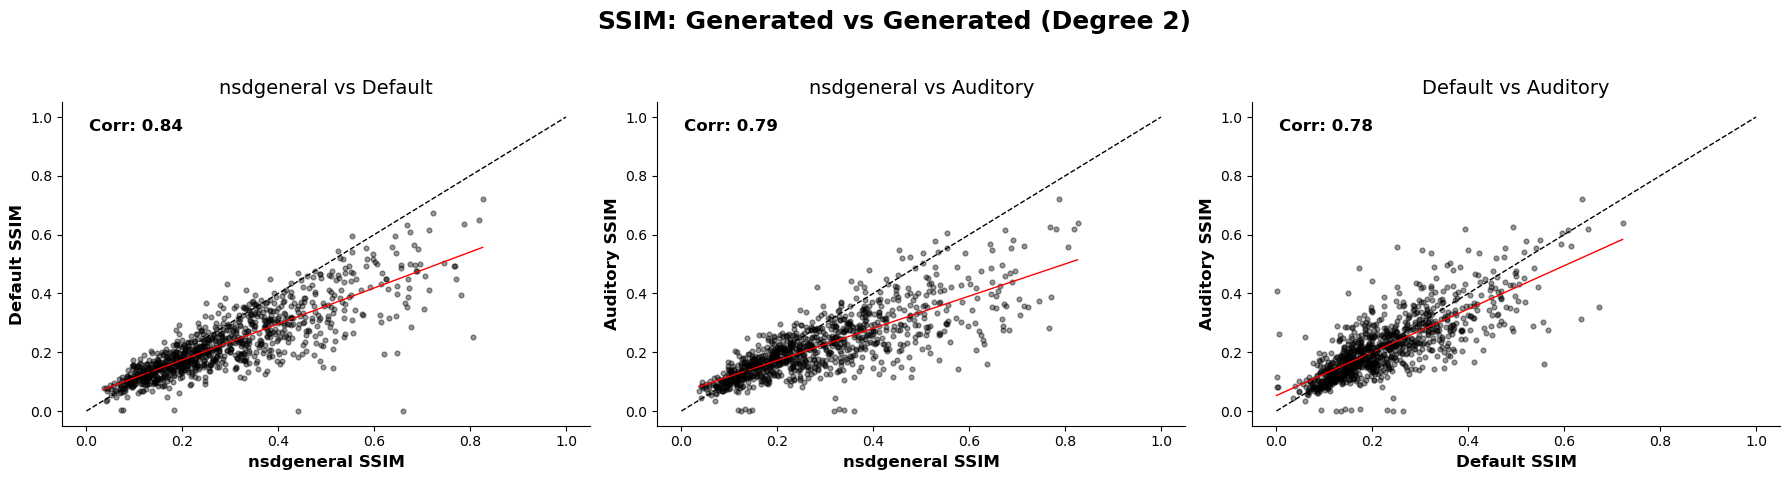

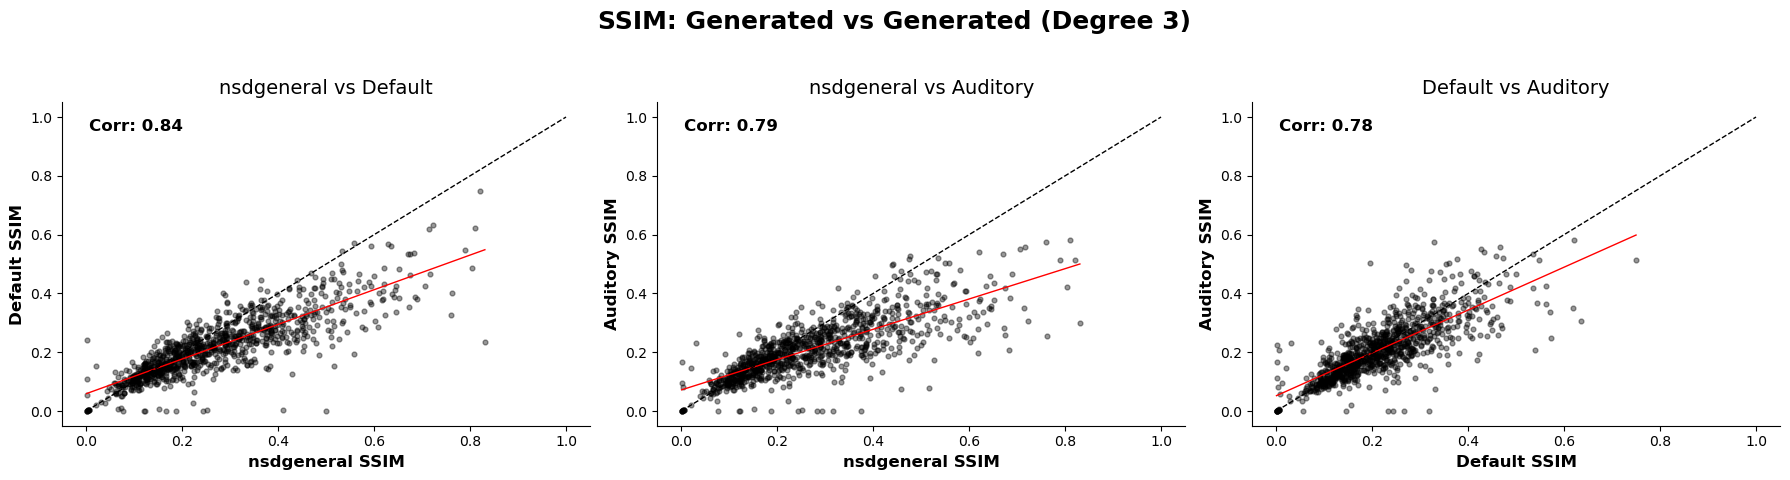

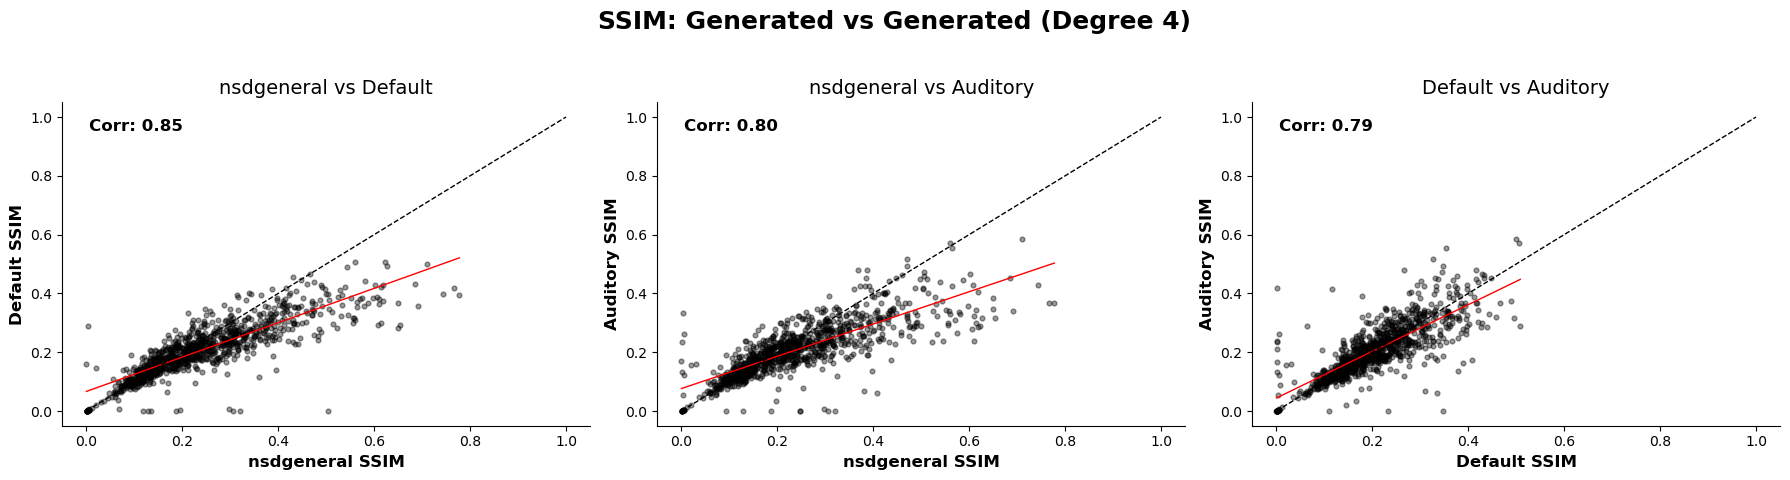

In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
from itertools import combinations

# ── ADJUST THIS TO WHERE YOUR PICKLE LIVES ────────────────────────────────────
pkl_path = Path(r'C:\Users\sOrOush\SoroushProjects\14_CLIP_Ozcelic\results\assessor_results\ssim_res.pkl')
# ────────────────────────────────────────────────────────────────────────────────

# Load data
with open(pkl_path, 'rb') as f:
    ssim_res = pickle.load(f)

groups = ['nsdgeneral', 'Default', 'Auditory']
pairs  = list(combinations(groups, 2))

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top']   = False

for degree in [1, 2, 3, 4]:
    fig, axes = plt.subplots(1, len(pairs), figsize=(6 * len(pairs), 5))
    fig.suptitle(f'SSIM: Generated vs Generated (Degree {degree})',
                 fontsize=18, fontweight='bold')

    for ax, (g1, g2) in zip(axes, pairs):
        key1 = f'{g1}_degree{degree}'
        key2 = f'{g2}_degree{degree}'
        x = np.array(ssim_res.get(key1, []))
        y = np.array(ssim_res.get(key2, []))

        # Truncate to shortest
        n = min(x.size, y.size)
        if n == 0:
            ax.text(0.5, 0.5, 'No data', ha='center', va='center',
                    color='red', fontsize=14)
            ax.set_xticks([]); ax.set_yticks([])
        else:
            x, y = x[:n], y[:n]
            ax.scatter(x, y, s=12, alpha=0.4, color='black')

            # regression
            m, b = np.polyfit(x, y, 1)
            xs = np.array([x.min(), x.max()])
            ax.plot(xs, m * xs + b, color='red', linewidth=1)

            # corr
            corr = np.corrcoef(x, y)[0, 1]
            ax.text(0.05, 0.95, f'Corr: {corr:.2f}',
                    transform=ax.transAxes, va='top',
                    fontsize=12, fontweight='bold')

        # 45° reference
        ax.plot([0, 1], [0, 1], 'k--', linewidth=1)

        ax.set_xlabel(f'{g1} SSIM', fontsize=12, fontweight='bold')
        ax.set_ylabel(f'{g2} SSIM', fontsize=12, fontweight='bold')
        ax.set_title(f'{g1} vs {g2}', fontsize=14)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


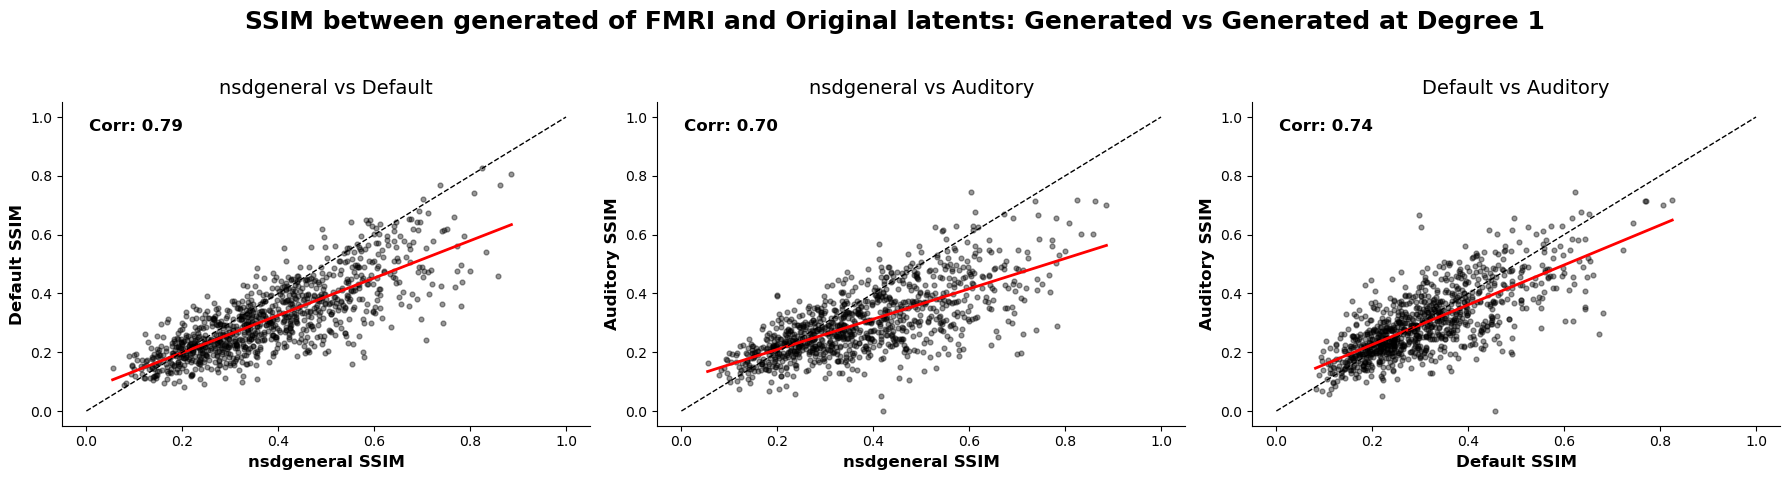

In [13]:
import pickle
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from itertools import combinations

# ── ADJUST THE PATH TO YOUR PICKLE FILE ───────────────────────────────────────
pkl_path = Path(r'C:\Users\sOrOush\SoroushProjects\14_CLIP_Ozcelic\results\assessor_results\ssim_res_image_image.pkl')
# ────────────────────────────────────────────────────────────────────────────────

# Load the SSIM results dictionary
with open(pkl_path, 'rb') as f:
    ssim_res = pickle.load(f)

# Configuration
groups = ['nsdgeneral', 'Default', 'Auditory']
degree = 1  # Change this to plot other degrees

# Generate all pairwise group combinations
pairs = list(combinations(groups, 2))

# Figure setup
fig, axes = plt.subplots(1, len(pairs), figsize=(6 * len(pairs), 5))
fig.suptitle(f'SSIM between generated of FMRI and Original latents: Generated vs Generated at Degree {degree}', fontsize=18, fontweight='bold')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top']   = False

# Plot each pair
for ax, (g1, g2) in zip(axes, pairs):
    key1 = f'{g1}_degree{degree}'
    key2 = f'{g2}_degree{degree}'
    x = np.array(ssim_res.get(key1, []))
    y = np.array(ssim_res.get(key2, []))

    # Truncate to shortest length
    n = min(len(x), len(y))
    if n == 0:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center', color='red', fontsize=14)
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        x = x[:n]
        y = y[:n]
        # Scatter points
        ax.scatter(x, y, s=12, alpha=0.4, color='black')
        # Regression line
        m, b = np.polyfit(x, y, 1)
        xs = np.array([x.min(), x.max()])
        ax.plot(xs, m * xs + b, color='red', linewidth=2)
        # Correlation coefficient
        corr_coef = np.corrcoef(x, y)[0, 1]
        ax.text(0.05, 0.95, f'Corr: {corr_coef:.2f}',
                transform=ax.transAxes, va='top', fontsize=12, fontweight='bold')

    ax.plot([0, 1], [0, 1], 'k--', linewidth=1)  # 45° reference line
    ax.set_xlabel(f'{g1} SSIM', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'{g2} SSIM', fontsize=12, fontweight='bold')
    ax.set_title(f'{g1} vs {g2}', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

